<a href="https://colab.research.google.com/github/afifi-yusuf/Spotify-Prediction/blob/main/DSFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/wsj/college-salaries?datasetId=1189
#https://www.kaggle.com/code/tunahandeniz/olympic-games-predict-medals/data
'''other ideas:
#https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects.   NASA nearest objects to earth dataset - use logistic regression and KNN to predict whetehr the objects are safe or hazardous
#https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide/code. Predict oil/gas prices
#https://www.kaggle.com/datasets/parisrohan/credit-score-classification. Build a machine learning model that can classify the credit score using financial information.
#https://www.kaggle.com/datasets/omkargowda/football-players-stats-premier-league-20212022. Predict the market value of premier league soccer players using various features
#https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge. Predict the price of cars based on various features.
#https://www.kaggle.com/datasets/midhundasl/mobile-price-hike-data. Predict the price of mobile phones
#https://www.kaggle.com/code/jonspags/premier-league-eda
#https://www.kaggle.com/code/parthchittawar/spotify-hit-prediction/data. Predict whether a song is going to be a hit or not using SVM, logistic regression, decision trees and see which algorithm performs best at classifying hits
Link to Brainstorm: https://docs.google.com/document/d/1z4nWGD_-o7PMuf03ceyvu2O7W5_nq7G9EsMAug3Dxrk/edit?usp=sharing
Link to Report: https://docs.google.com/document/d/1JlXgPfBAGACbPrFvM_5grpcV3t77CIf8K4gRQo3cLL8/edit?usp=sharing

'''

'other ideas: \n#https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects.   NASA nearest objects to earth dataset - use logistic regression and KNN to predict whetehr the objects are safe or hazardous\n#https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide/code. Predict oil/gas prices\n#https://www.kaggle.com/datasets/parisrohan/credit-score-classification. Build a machine learning model that can classify the credit score using financial information.\n#https://www.kaggle.com/datasets/omkargowda/football-players-stats-premier-league-20212022. Predict the market value of premier league soccer players using various features\n#https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge. Predict the price of cars based on various features.\n#https://www.kaggle.com/datasets/midhundasl/mobile-price-hike-data. Predict the price of mobile phones\n#https://www.kaggle.com/code/jonspags/premier-league-eda \n#https://www.kaggle.com/code/parthchittawar/sp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from math import sqrt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/CS97/Project/dataset-of-10s.csv')

In [ ]:
df.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.0000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.8140,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.0000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.0000,0.3910,0.780,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.0000,0.4090,0.737,165.084,214320,4,32.17301,12,1
6,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.533,0.935,0,-3.704,1,0.1280,0.01390,0.0000,0.1680,0.481,140.092,262493,4,21.04510,14,0
7,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.0000,0.1080,0.369,97.547,200387,4,60.21027,10,1
8,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.166,0.985,7,-2.886,1,0.1700,0.00183,0.0142,0.9580,0.139,174.725,252787,4,31.23583,11,0
9,My Last,Big Sean Featuring Chris Brown,spotify:track:70tFuqBcduJv15bEnOPRTh,0.387,0.773,8,-5.685,1,0.1700,0.09800,0.0000,0.2090,0.368,78.629,254120,4,23.30245,9,1


In [ ]:
corrMatrix = df.corr()
corrMatrix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.069645,0.012429,0.300576,-0.057280,0.200090,-0.206865,-0.371334,-0.107581,0.494136,-0.056197,-0.224803,0.178671,-0.078254,-0.162908,0.384486
energy,0.069645,1.000000,0.028703,0.774536,0.004929,0.119194,-0.734853,-0.288263,0.231393,0.281031,0.216886,-0.009228,0.175984,-0.001224,-0.074466,0.060701
key,0.012429,0.028703,1.000000,0.010824,-0.146063,0.022796,-0.021271,-0.013049,0.021785,0.019572,0.009259,0.011028,-0.008462,0.001960,0.002512,0.005548
loudness,0.300576,0.774536,0.010824,1.000000,0.021064,0.122028,-0.648717,-0.533671,0.126807,0.324985,0.194467,-0.094598,0.207436,-0.042665,-0.111469,0.327471
mode,-0.057280,0.004929,-0.146063,0.021064,1.000000,-0.090107,0.011424,-0.037132,-0.011590,0.018198,0.032180,-0.042125,0.014125,-0.007967,-0.030129,0.032021
speechiness,0.200090,0.119194,0.022796,0.122028,-0.090107,1.000000,-0.134226,-0.148649,0.121075,0.053836,0.117813,-0.071826,0.063656,0.001857,-0.035077,0.097783
acousticness,-0.206865,-0.734853,-0.021271,-0.648717,0.011424,-0.134226,1.000000,0.315563,-0.149926,-0.166253,-0.182050,-0.039567,-0.191607,0.001477,0.024583,-0.184479
instrumentalness,-0.371334,-0.288263,-0.013049,-0.533671,-0.037132,-0.148649,0.315563,1.000000,-0.049879,-0.334662,-0.083487,0.183696,-0.133629,0.093847,0.114927,-0.499624
liveness,-0.107581,0.231393,0.021785,0.126807,-0.011590,0.121075,-0.149926,-0.049879,1.000000,-0.016562,0.038555,0.040219,0.026185,0.043099,0.008406,-0.062612
valence,0.494136,0.281031,0.019572,0.324985,0.018198,0.053836,-0.166253,-0.334662,-0.016562,1.000000,0.053572,-0.248445,0.117049,-0.103274,-0.168675,0.203774


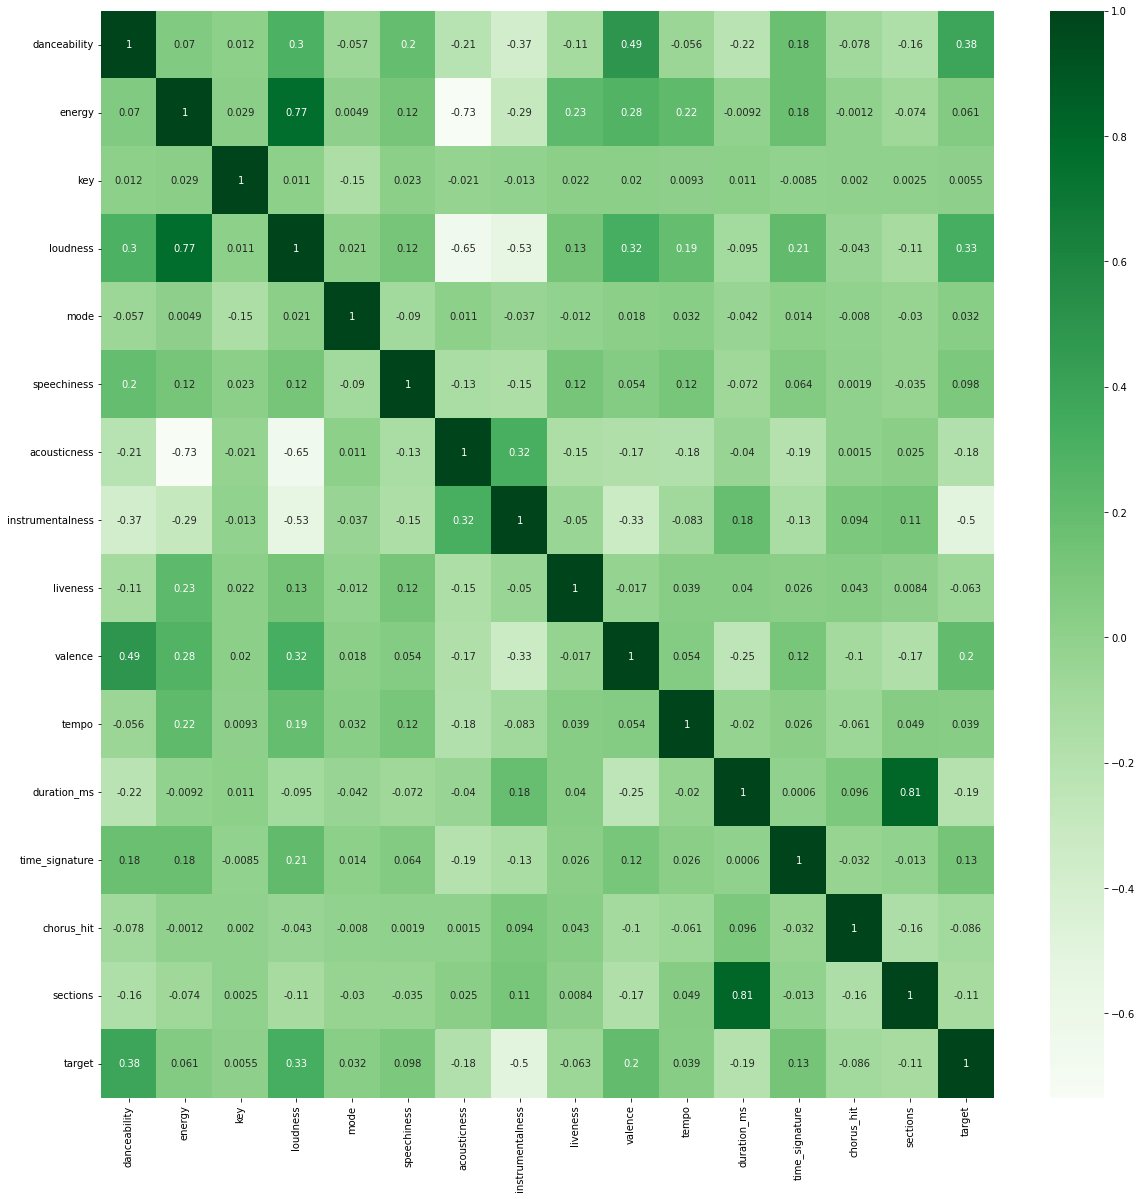

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True, ax=ax, cmap = plt.get_cmap('Greens'))

In [ ]:
# drop columns with no correlation
df = df.drop(['key'], axis = 1)
# drop irrelevant columns
df = df.drop(['uri', 'artist','track'], axis = 1)

# checking for null values
df.isnull().sum()

danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [ ]:
df.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      6398 non-null   float64
 1   energy            6398 non-null   float64
 2   loudness          6398 non-null   float64
 3   mode              6398 non-null   int64  
 4   speechiness       6398 non-null   float64
 5   acousticness      6398 non-null   float64
 6   instrumentalness  6398 non-null   float64
 7   liveness          6398 non-null   float64
 8   valence           6398 non-null   float64
 9   tempo             6398 non-null   float64
 10  duration_ms       6398 non-null   int64  
 11  time_signature    6398 non-null   int64  
 12  chorus_hit        6398 non-null   float64
 13  sections          6398 non-null   int64  
 14  target            6398 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 749.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ec4ebeed0>,
      dtype=object)

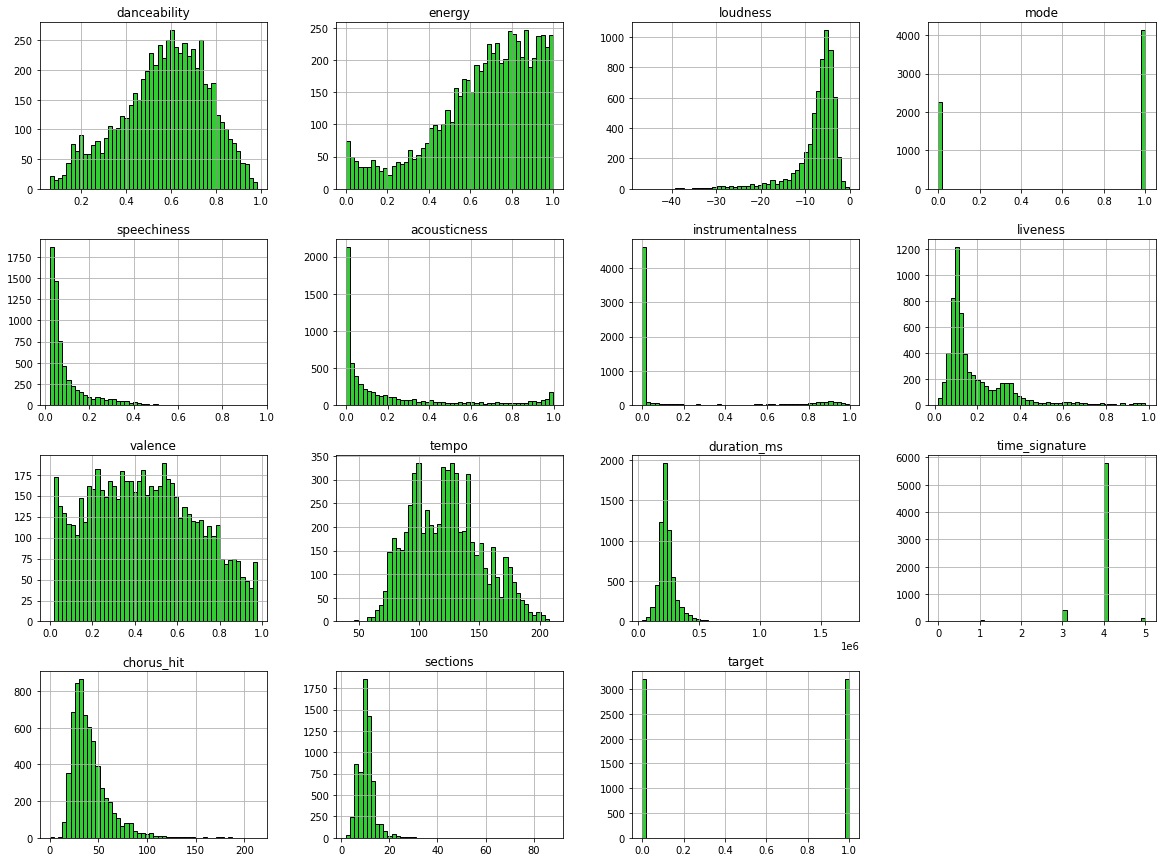

In [ ]:
df.hist(bins=50, figsize=(20,15), color = 'limegreen', ec = 'black')

1    3199
0    3199
Name: target, dtype: int64

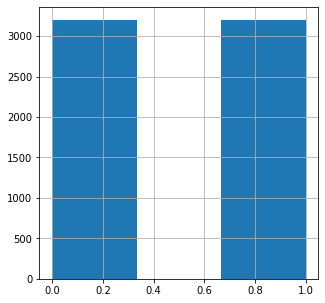

In [ ]:
#check if target data is balanced
df['target'].hist(bins=3, figsize = (5,5))
df['target'].value_counts()

In [ ]:
x = df.drop(['target'], axis = 1)
y = df['target']

# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size = 0.8, shuffle = 1, random_state = 1)


scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index = x_train.index, columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index = x_test.index,columns = x_test.columns)

NameError: ignored

In [ ]:
#fitting the pre-processed data to 5 models
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
}

for name, model in models.items():
    model.fit(x_train,y_train)
    print(name + "Trained!!")

                   Logistic RegressionTrained!!
                   K-Nearest NeighborsTrained!!
                         Decision TreeTrained!!


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Support Vector Machine (Linear Kernel)Trained!!
   Support Vector Machine (RBF Kernel)Trained!!


In [ ]:
#outputting the results of the model in predicting hits for test data before optimizing hyperparamters
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                   Logistic Regression: 79.22%
                   K-Nearest Neighbors: 78.91%
                         Decision Tree: 76.72%
Support Vector Machine (Linear Kernel): 79.53%
   Support Vector Machine (RBF Kernel): 81.64%


In [ ]:
from sklearn.base import BaseEstimator
#KNN

#optimize the value of k in KNN
best_k = 0
max_accuracy = 0
k_values = [1,2,3,5,7,8,10,100]
for k in k_values:
  knreg = KNeighborsClassifier(n_neighbors = k)
  knreg.fit(x_train, y_train)
  r2_train = knreg.score(x_train, y_train)

  predicted = knreg.predict(x_test)
  accuracy = accuracy_score(y_test, predicted)
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    best_k = k

print("best k: " + str(best_k))
print("Accuracy: "+ str(max_accuracy))

best k: 7
Accuracy: 0.79609375


In [ ]:
# from the code above, we can see that k =7 is the optimal k for this case
knreg = KNeighborsClassifier(n_neighbors = 7)
knreg.fit(x_train, y_train)
predicted = knreg.predict(x_test)
print(predicted)

[1 1 0 ... 1 0 1]


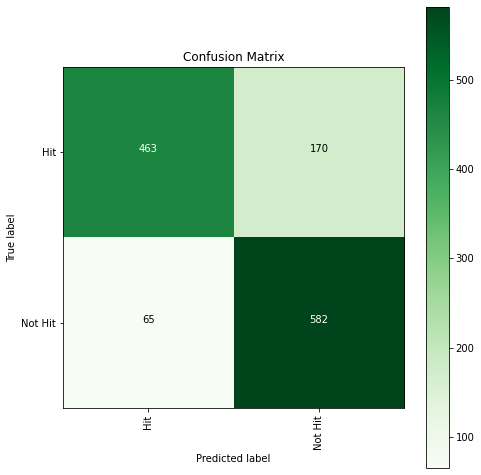

In [ ]:
#confusion matrix for knn model

def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''

    plt.figure(figsize = (7, 7))
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

draw_confusion_matrix(y_test, predicted, ['Hit', 'Not Hit'])

In [ ]:
# optimized results for KNN model
def print_4_metrics(target_test, predicted):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))

print_4_metrics(y_test, predicted)

Accuracy:    0.796094
Precision:   0.740050
Recall:      0.919629
F1 Score:    0.820124


In [ ]:
# optimizing hyperparamters (C, penalty regularization, solver method) for logistic regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #KFold Validation
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Best: 0.809302 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

NameError: ignored

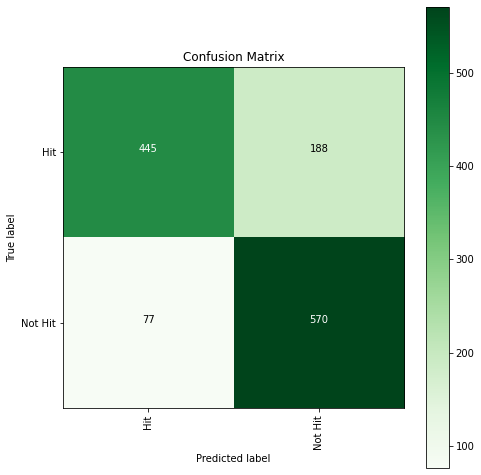

In [ ]:
#confusion matrix for optimized logistic regression
log_reg = LogisticRegression(C=1,penalty="l2", solver = "liblinear")
log_reg.fit(x_train, y_train)
predicted = log_reg.predict(x_test)
draw_confusion_matrix(y_test, predicted, ['Hit', 'Not Hit'])

In [ ]:
# optimized results for logistic regression model
print_4_metrics(y_test, predicted)

Accuracy:    0.792969
Precision:   0.751979
Recall:      0.880989
F1 Score:    0.811388


In [ ]:
# Optimize the max depth in decision tree model
max_accuracy = 0
max_depth = 0
for md in range(1,200):
  dt = DecisionTreeClassifier(max_depth = md)
  dt.fit(x_train, y_train)
  r2_train = dt.score(x_train, y_train)

  predicted = dt.predict(x_test)
  accuracy_dt = accuracy_score(y_test, predicted)
  if accuracy_dt > max_accuracy:
    max_accuracy = accuracy_dt
    max_depth = md

print("max depth: " + str(max_depth))
print("Accuracy: "+ str(max_accuracy))


max depth: 8
Accuracy: 0.8171875


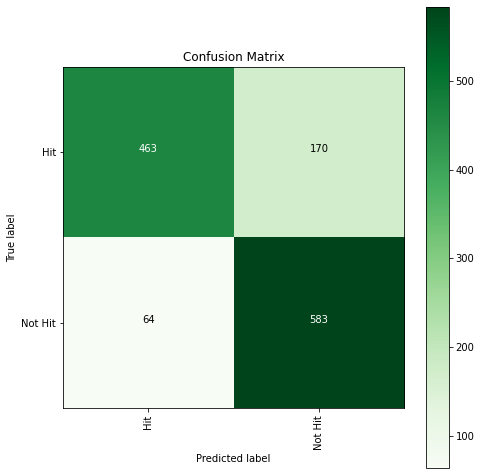

In [ ]:
# therefore best max_depth for the decision tree model is 8
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(x_train, y_train)
predicted = dt.predict(x_test)
draw_confusion_matrix(y_test, predicted, ['Hit', 'Not Hit'])

In [ ]:
# test the accuracy of the test data for the decision tree model
print_4_metrics(y_test, predicted)

Accuracy:    0.820312
Precision:   0.776159
Recall:      0.905719
F1 Score:    0.835949


In [ ]:
'''
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
'''
kernels = ["linear", "poly", "rbf"]
for kernel in kernels:
  svm = SVC(kernel = kernel)
  svm.fit(x_train, y_train)
  predicted = svm.predict(x_test)
  accuracy = accuracy_score(y_test, predicted)
  print("kernel: " + kernel + " accuracy: " + str(accuracy))

#rbf is the best kernel function for svm in this case


kernel: linear accuracy: 0.8
kernel: poly accuracy: 0.7828125
kernel: rbf accuracy: 0.81640625


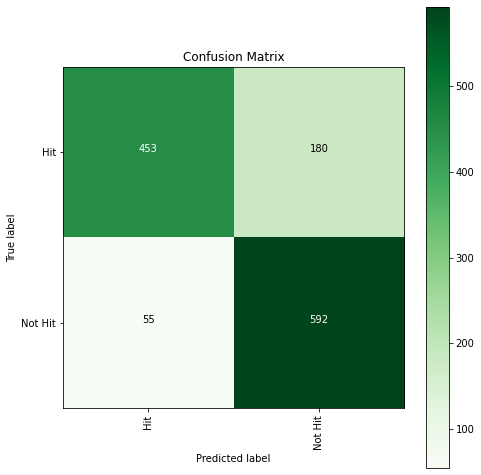

In [ ]:
svm = SVC(kernel = "rbf")
svm.fit(x_train, y_train)
predicted = svm.predict(x_test)
draw_confusion_matrix(y_test, predicted, ['Hit', 'Not Hit'])

In [ ]:
# test the accuracy of the test data for the svm model
print_4_metrics(y_test, predicted)

Accuracy:    0.816406
Precision:   0.766839
Recall:      0.914992
F1 Score:    0.834390


In [ ]:
# Neural Network

for x in range(5,15):
        mlp = MLPClassifier(hidden_layer_sizes = (x, x, x), activation = 'relu', solver = 'adam', max_iter = 500)
        mlp.fit(x_train, y_train)

        pred_train = mlp.predict(x_train)
        train_accuracy = accuracy_score(y_train, pred_train)

        print(str(x) + " : " + str(train_accuracy))

5 : 0.8378272762797968
6 : 0.8403673309886674
7 : 0.8458382180539273
8 : 0.8569753810082064
9 : 0.8522860492379836
10 : 0.8602969910121141
11 : 0.8624462680734662
12 : 0.8663540445486518
13 : 0.874169597499023
14 : 0.8751465416178195


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (13,13,13), activation = 'relu', solver = 'adam', max_iter = 500)
mlp.fit(x_train, y_train)

pred_test = mlp.predict(x_test)
train_accuracy = accuracy_score(y_test, pred_test)

print_4_metrics(y_test, pred_test)

NameError: ignored

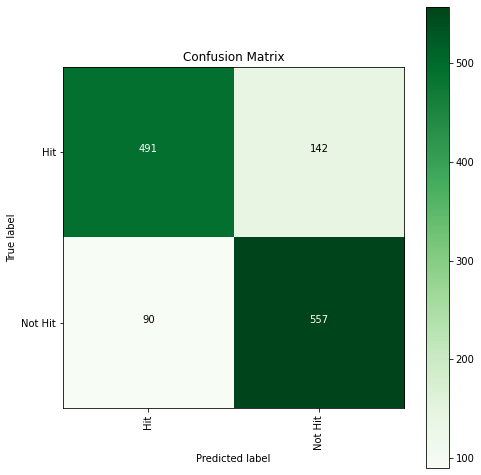

In [ ]:
draw_confusion_matrix(y_test, pred_test, ['Hit', 'Not Hit'])

In [ ]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

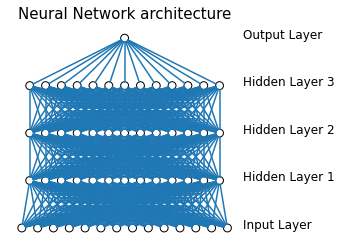

In [ ]:
network = DrawNN([14,13,13,13,1])
network.draw()
